In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Fungsi untuk menampilkan gambar menggunakan Matplotlib
def show_image(title, image, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [4]:
# Baca gambar dalam format BGR
image_path = 'markajalan.jpeg'
image = cv2.imread(image_path)

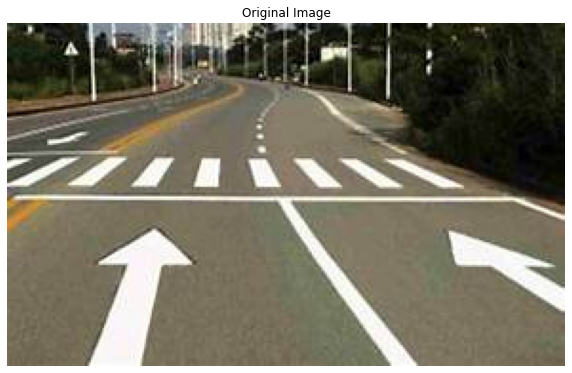

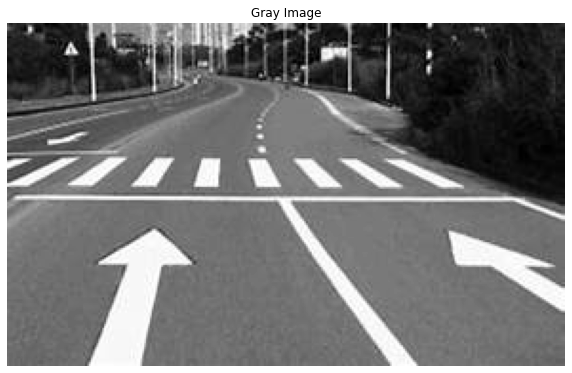

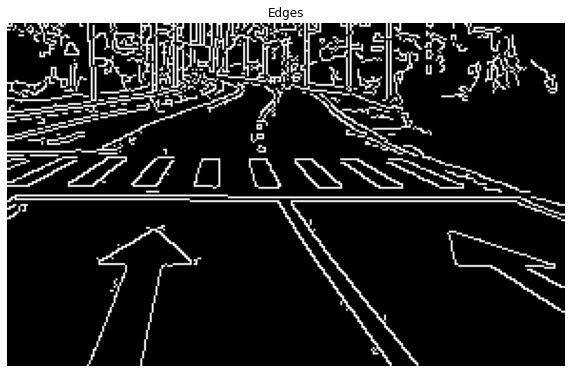

In [5]:
# Pastikan gambar terbaca
if image is None:
    print("Gambar tidak ditemukan atau tidak dapat dibaca.")
else:
    # Konversi gambar dari BGR ke RGB untuk ditampilkan dengan benar menggunakan Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Konversi gambar ke Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    # Deteksi garis menggunakan Transformasi Hough
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    # Gambar garis pada gambar asli
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Tampilkan hasil
    show_image('Original Image', image_rgb)
    show_image('Gray Image', gray_image, cmap='gray')
    show_image('Edges', edges, cmap='gray')

    # Simpan hasil gambar
    cv2.imwrite('/mnt/data/edges.jpg', edges)
    cv2.imwrite('/mnt/data/hough_lines.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))